# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Read in to data drame
df = pd.read_csv(output_data_file)
df.sample(10)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
70,70,ponta do sol,0,BR,1558378767,57,-20.63,-46.00,73.68,5.32
285,285,luderitz,39,NaN,1558378806,72,-26.65,15.16,62.60,18.34
208,208,san rafael del sur,40,NI,1558378793,49,11.85,-86.44,91.40,13.87
424,424,arenapolis,27,BR,1558378876,34,-14.45,-56.85,89.52,3.94
219,219,beisfjord,0,NO,1558378796,51,68.38,17.60,60.80,11.41
143,143,yichun,89,CN,1558378781,98,47.72,128.88,41.64,3.58
460,460,manuk mangkaw,99,PH,1558378883,68,4.80,119.85,86.10,5.57
55,55,khatanga,10,RU,1558378764,92,71.98,102.47,9.96,10.94
210,210,ribeira grande,40,PT,1558378794,88,38.52,-28.70,66.20,10.29
72,72,butaritari,55,KI,1558378767,77,3.07,172.79,83.94,9.13


## Generate Cities List

In [2]:
#Dataframe
df.sample(10)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
422,422,susuman,0,RU,1558378875,75,62.78,148.15,22.38,3.15
141,141,sanchazi,0,CN,1558378781,82,30.43,103.62,64.40,2.24
276,276,rabo de peixe,40,PT,1558378839,88,37.80,-25.58,66.20,12.75
300,300,betafo,9,MG,1558378845,92,-19.84,46.86,58.20,3.47
106,106,hilo,40,US,1558378755,69,19.71,-155.08,79.00,4.70
508,508,noumea,0,NC,1558378811,77,-22.28,166.46,64.40,2.24
70,70,ponta do sol,0,BR,1558378767,57,-20.63,-46.00,73.68,5.32
513,513,denpasar,20,ID,1558378866,94,-8.65,115.22,80.60,8.05
55,55,khatanga,10,RU,1558378764,92,71.98,102.47,9.96,10.94
525,525,mecca,1,SA,1558378872,48,21.43,39.83,88.62,1.74


In [3]:
## Add column to pair lat and long
df["Lat_Lng"] = df["Lat"].astype(str) + ", " + df["Lat"].astype(str)
df

# List for holding lat_lngs and cities
lat_list = df['Lat'].tolist()
lng_list = df['Lng'].tolist()
city_list = df['City'].tolist()
city_list

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

620

In [4]:
cities

['barrow',
 'westport',
 'nizhniy kuranakh',
 'hofn',
 'marcona',
 'rikitea',
 'zhaotong',
 'new norfolk',
 'verkhnevilyuysk',
 'puerto ayora',
 'haines junction',
 'bluff',
 'nikolskoye',
 'ushuaia',
 'castro',
 'latur',
 'gloversville',
 'hilo',
 'saint george',
 'tsaritsani',
 'kapaa',
 'basco',
 'saleaula',
 'busselton',
 'cherskiy',
 'atuona',
 'samusu',
 'salalah',
 'butaritari',
 'ambulu',
 'tiksi',
 'hay river',
 'illoqqortoormiut',
 'chulman',
 'cabo san lucas',
 'cayenne',
 'alofi',
 'labuhan',
 'aswan',
 'san patricio',
 'taolanaro',
 'upernavik',
 'dabat',
 'can',
 'cape town',
 'jamestown',
 'lavrentiya',
 'ponta do sol',
 'beatrice',
 'inuvik',
 'leningradskiy',
 'mataura',
 'lincoln',
 'vila velha',
 'port alfred',
 'husavik',
 'bredasdorp',
 'vestmannaeyjar',
 'mandalay',
 'mubi',
 'chicama',
 'narsaq',
 'yirol',
 'los llanos de aridane',
 'pafos',
 'willowmore',
 'buraydah',
 'rawson',
 'mahebourg',
 'east london',
 'flin flon',
 'nantucket',
 'cimitarra',
 'avarua',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
city = 'nioro'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
response

{'coord': {'lon': -15.75, 'lat': 13.35},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 28.98,
  'feels_like': 24.59,
  'temp_min': 28.98,
  'temp_max': 28.98,
  'pressure': 1008,
  'humidity': 16,
  'sea_level': 1008,
  'grnd_level': 1004},
 'visibility': 10000,
 'wind': {'speed': 3.57, 'deg': 5},
 'clouds': {'all': 0},
 'dt': 1609013120,
 'sys': {'country': 'GM', 'sunrise': 1608967406, 'sunset': 1609008232},
 'timezone': 0,
 'id': 2412408,
 'name': 'Nioro',
 'cod': 200}

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
response

Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
Fetched_Cities = []

for city in cities:
    
    response = requests.get(query_url + city).json()
    try:
        Fetched_Cities.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        print("Retrieved data for " + city)
    except:
        print(city + " data not found")



Retrieved data for barrow
Retrieved data for westport
Retrieved data for nizhniy kuranakh
Retrieved data for hofn
marcona data not found
Retrieved data for rikitea
Retrieved data for zhaotong
Retrieved data for new norfolk
Retrieved data for verkhnevilyuysk
Retrieved data for puerto ayora
Retrieved data for haines junction
Retrieved data for bluff
Retrieved data for nikolskoye
Retrieved data for ushuaia
Retrieved data for castro
Retrieved data for latur
Retrieved data for gloversville
Retrieved data for hilo
Retrieved data for saint george
Retrieved data for tsaritsani
Retrieved data for kapaa
Retrieved data for basco
saleaula data not found
Retrieved data for busselton
Retrieved data for cherskiy
Retrieved data for atuona
samusu data not found
Retrieved data for salalah
Retrieved data for butaritari
Retrieved data for ambulu
Retrieved data for tiksi
Retrieved data for hay river
illoqqortoormiut data not found
Retrieved data for chulman
Retrieved data for cabo san lucas
Retrieved data 

Retrieved data for milan
Retrieved data for orbetello
Retrieved data for iralaya
Retrieved data for baoro
Retrieved data for bayan
Retrieved data for tigil
Retrieved data for polillo
Retrieved data for qasigiannguit
Retrieved data for fenelon falls
Retrieved data for ereymentau
Retrieved data for san cristobal
Retrieved data for akyab
Retrieved data for margate
Retrieved data for isparta
Retrieved data for pisco
Retrieved data for revda
Retrieved data for yar-sale
Retrieved data for sain alto
Retrieved data for baykit
Retrieved data for mandalgovi
Retrieved data for sucre
Retrieved data for sterling
Retrieved data for sosnovo-ozerskoye
Retrieved data for hamina
grand centre data not found
Retrieved data for manzanillo
Retrieved data for hirara
Retrieved data for zhanaozen
Retrieved data for codrington
Retrieved data for yumen
Retrieved data for moroto
Retrieved data for guaruja
Retrieved data for do gonbadan
warqla data not found
Retrieved data for lusambo
Retrieved data for empalme
Re

Retrieved data for solenzo
cockburn harbour data not found
Retrieved data for daigo
Retrieved data for hacari
Retrieved data for bandar-e lengeh
Retrieved data for bykovo
Retrieved data for evensk
Retrieved data for rizhao
Retrieved data for shelburne
Retrieved data for kuryk
Retrieved data for churapcha
Retrieved data for port shepstone
Retrieved data for babushkin
Retrieved data for xichang
chagda data not found
Retrieved data for abu samrah
Retrieved data for baruun-urt
Retrieved data for valera
Retrieved data for igarka
Retrieved data for turayf
Retrieved data for najran
Retrieved data for chandur
tarudant data not found
kawana waters data not found
Retrieved data for thinadhoo
Retrieved data for togur
Retrieved data for haradok
Retrieved data for port hardy
Retrieved data for ratnagiri
Retrieved data for susanville
jiroft data not found
Retrieved data for svetlaya


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
##Display Datafram

fetched_data_df = pd.DataFrame(
    {'City': Fetched_Cities,
     'Latitude': Lat,
     'Longitude': Lng,
     'Max Temp' : Max_Temp,
     'Humidity' : Humidity,
     'Cloudiness' : Cloudiness,
     'Wind_Speed' : Wind_Speed,
     'Country' : Country,
    })
fetched_data_df

##Print to CSV
fetched_data_df.to_csv("output_data/API_data.csv", index = False)


In [15]:
fetched_data_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,20.966392,22.352627,8.856813,72.980736,48.669002,3.674518
std,32.965306,90.261494,19.046235,19.298886,40.495623,2.617625
min,-54.800000,-175.200000,-46.690000,10.000000,0.000000,0.260000
25%,-5.675000,-60.240000,-2.780000,65.000000,1.000000,1.635000
50%,26.570000,29.090000,15.000000,78.000000,42.000000,3.100000
75%,48.530000,102.385000,24.655000,86.500000,90.000000,5.100000
max,78.220000,179.320000,39.250000,100.000000,100.000000,13.900000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#  Get the indices of cities that have humidity over 100%.

humidity_above_100_df = fetched_data_df.loc[fetched_data_df['Humidity'] > 100]
humidity_above_100_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Country


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
##None above 100 as shown above

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [44]:

fetched_data_df.sample(15)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Country
310,Kahului,20.89,-156.47,26.00,54,20,1.50,US
5,Zhaotong,27.32,103.72,1.49,89,76,1.18,CN
320,Bubaque,11.28,-15.83,27.23,69,25,6.11,GW
281,Sittwe,20.15,92.90,17.92,75,0,3.12,MM
459,Almaznyy,48.04,40.05,4.00,93,90,2.00,RU
294,Manzanillo,20.34,-77.12,23.67,71,75,6.71,CU
425,Manama,26.22,50.58,18.00,55,0,4.10,BH
494,Sergeevka,53.88,67.42,-19.65,91,60,3.30,KZ
82,Águas Vermelhas,-15.75,-41.46,23.88,78,13,2.81,BR
189,Charters Towers,-20.10,146.27,21.85,89,100,3.92,AU


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Max Temperatures currently seem to be higher in the southern hemisphere.


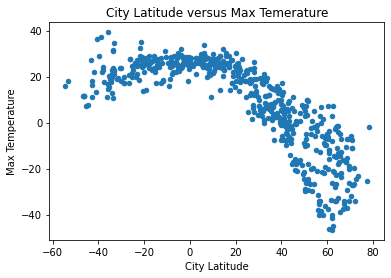

In [49]:
#fetched_data_df.plot.scatter(x = 'Lat', y = 'Max Temp')

#fetched_data_df.plot.scatter('Lat', 'Max Temp', s=None, c=None)

fig1 = fetched_data_df.plot.scatter(x='Latitude',
                      y='Max Temp', title = 'City Latitude versus Max Temerature')
fig1.set_xlabel("City Latitude")
fig1.set_ylabel("Max Temperature")

print("We are determining if latitude has an influence on max temperatures. Max Temperatures currently seem to be higher in the southern hemisphere.")

## Latitude vs. Humidity Plot

We are determining if latitude has an influence on current humidity. Humidity currently seem to be dispersed in the southern hemisphere, but the northern hemisphere generally has higher humidities at higher latitudes.


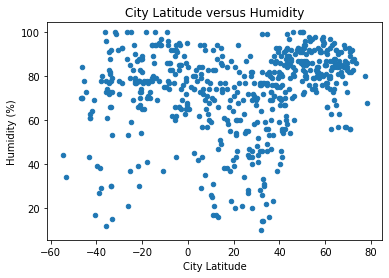

In [50]:
fig2 = fetched_data_df.plot.scatter(x='Latitude',
                      y='Humidity', title = 'City Latitude versus Humidity')
fig2.set_xlabel("City Latitude")
fig2.set_ylabel("Humidity (%)")

print("We are determining if latitude has an influence on current humidity. Humidity currently seem to be dispersed in the southern hemisphere, but the northern hemisphere generally has higher humidities at higher latitudes.")

## Latitude vs. Cloudiness Plot

We are determining if latitude has an influence on cloudiness. There does not visually appear to be a clear relationship between latitude and cloudiness.


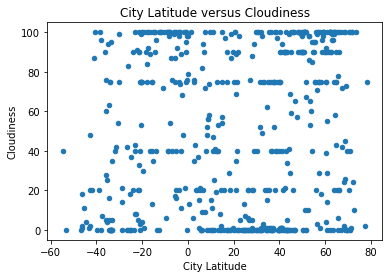

In [51]:
fig3 = fetched_data_df.plot.scatter(x='Latitude',
                      y='Cloudiness', title = 'City Latitude versus Cloudiness')
fig3.set_xlabel("City Latitude")
fig3.set_ylabel("Cloudiness")

print("We are determining if latitude has an influence on cloudiness. There does not visually appear to be a clear relationship between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

We are determining if latitude has an influence on wind speed. While the relationship doesnt seem overly strong, there are some higher wind speeds and the higher end of the latitude range.


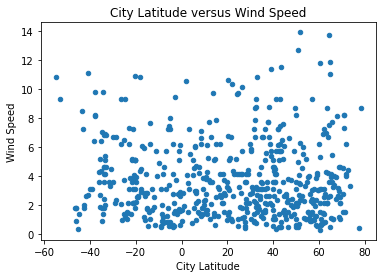

In [52]:
fig3 = fetched_data_df.plot.scatter(x='Latitude',
                      y='Wind_Speed', title = 'City Latitude versus Wind Speed')
fig3.set_xlabel("City Latitude")
fig3.set_ylabel("Wind Speed")

print("We are determining if latitude has an influence on wind speed. While the relationship doesnt seem overly strong, there are some higher wind speeds and the higher end of the latitude range.")

## Linear Regression

In [54]:
northern_hem_df = fetched_data_df.loc[fetched_data_df['Latitude'] > 0]

southern_hem_df = fetched_data_df.loc[fetched_data_df['Latitude'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

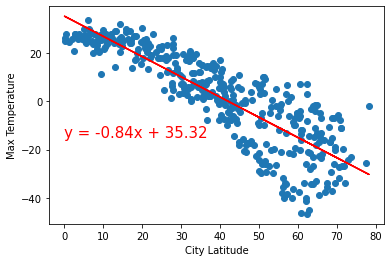

The r-squared is: 0.7336211584791809


In [65]:
x_values = northern_hem_df['Latitude']
y_values = northern_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-15),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.show()
print(f"The r-squared is: {rvalue**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

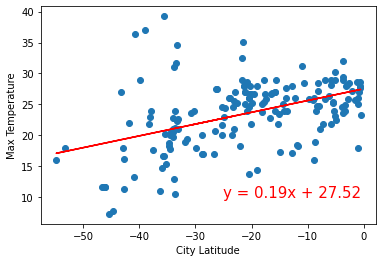

The r-squared is: 0.20677774482155242


In [72]:
x_values = southern_hem_df['Latitude']
y_values = southern_hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

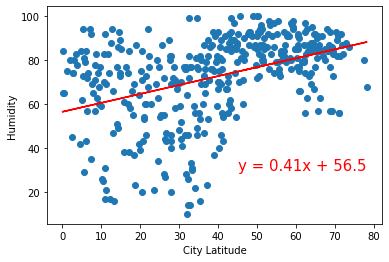

The r-squared is: 0.16803781443231833


In [75]:
x_values = northern_hem_df['Latitude']
y_values = northern_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

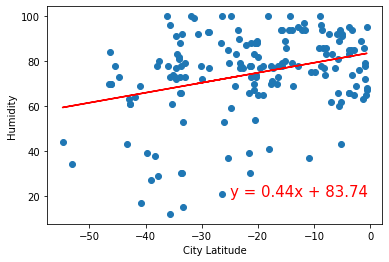

The r-squared is: 0.10064257220570347


In [78]:
x_values = southern_hem_df['Latitude']
y_values = southern_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

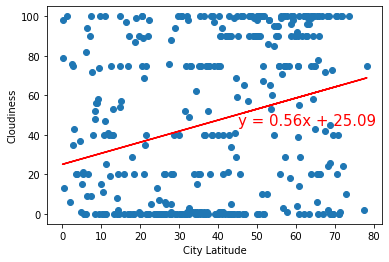

The r-squared is: 0.07292219452126666


In [80]:
x_values = northern_hem_df['Latitude']
y_values = northern_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

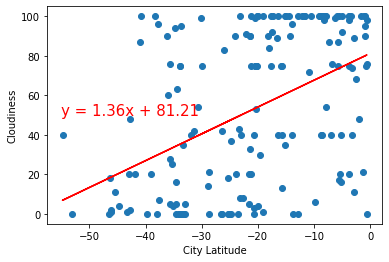

The r-squared is: 0.2094801330241329


In [83]:
x_values = southern_hem_df['Latitude']
y_values = southern_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

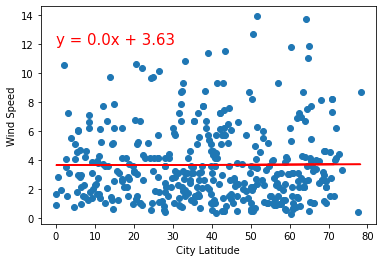

The r-squared is: 2.8191839192064135e-05


In [88]:
x_values = northern_hem_df['Latitude']
y_values = northern_hem_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

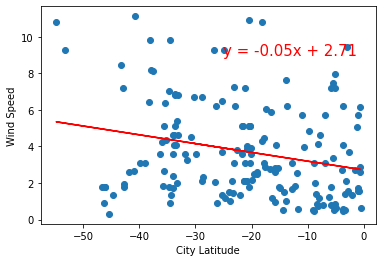

The r-squared is: 0.0613864377584683


In [92]:
x_values = southern_hem_df['Latitude']
y_values = southern_hem_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,9),fontsize=15,color="red")
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-squared is: {rvalue**2}")